<a href="https://colab.research.google.com/github/AnishTeku/DataScienceFinalProjet-JP-Morgan-forecasting-/blob/main/22013306_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('JPM-Multiverse.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-01-02,36.56,37.07,36.53,36.62,20.83,9280500
1,2004-01-05,36.66,36.86,36.30,36.55,20.79,9715400
2,2004-01-06,37.15,37.57,37.09,37.47,21.32,21209800
3,2004-01-07,37.50,38.09,37.49,38.02,21.63,14472600
4,2004-01-08,38.10,38.77,38.06,38.67,22.00,11834300
5,2004-01-09,38.40,39.14,38.35,38.76,22.05,10569000
6,2004-01-12,38.50,39.15,38.42,38.79,22.07,7044400
7,2004-01-13,38.80,38.95,38.45,38.90,22.13,7205200
8,2004-01-14,39.08,39.33,38.93,39.22,22.31,8672300
9,2004-01-15,39.85,39.95,38.70,38.92,22.14,50329900


In [ ]:
data.info()
data.describe()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5221 entries, 0 to 5220
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5221 non-null   object 
 1   Open       5221 non-null   float64
 2   High       5221 non-null   float64
 3   Low        5221 non-null   float64
 4   Close      5221 non-null   float64
 5   Adj Close  5221 non-null   float64
 6   Volume     5221 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 285.6+ KB


(5221, 7)

## **Data Preparation and understanding**

In [ ]:
# Convert 'Date' column to datetime format and set 'Date' as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_values


,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


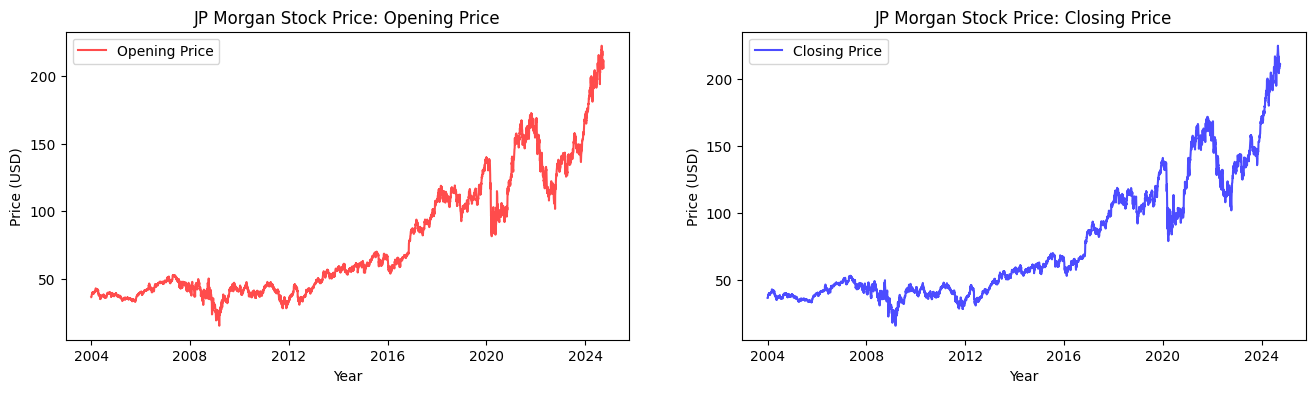

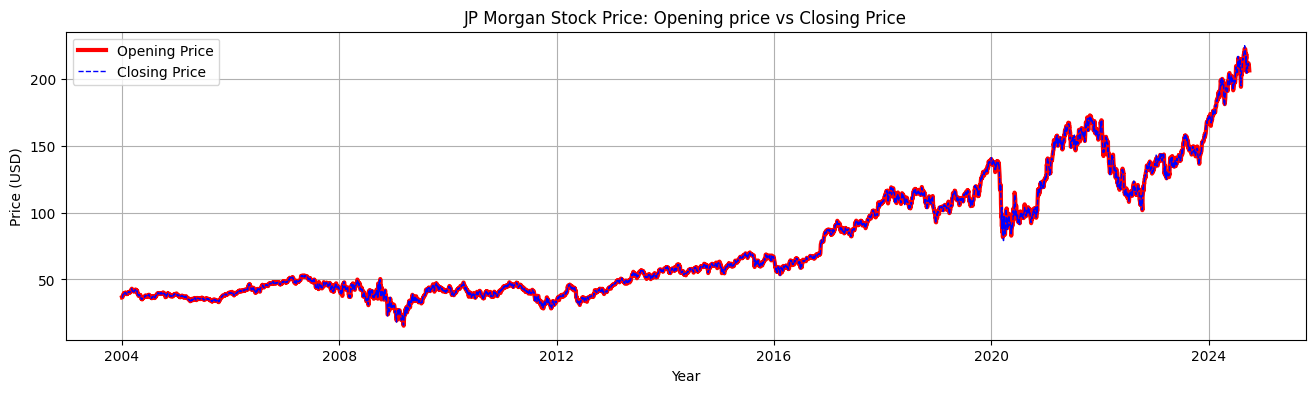

In [ ]:
import matplotlib.pyplot as plt

# Creating subplots for Opening and Closing prices
fig, jp = plt.subplots(1, 2, figsize=(16, 4), sharex=True)

# Plot for Opening Price and Closing price
jp[0].plot(data.index, data['Open'], label='Opening Price', color='red', linestyle='-', alpha=0.7)
jp[0].set_title("JP Morgan Stock Price: Opening Price")
jp[0].set_xlabel("Year")
jp[0].set_ylabel("Price (USD)")
jp[0].legend()

jp[1].plot(data.index, data['Close'], label='Closing Price', color='blue', linestyle='-', alpha=0.7)
jp[1].set_title("JP Morgan Stock Price: Closing Price")
jp[1].set_xlabel("Year")
jp[1].set_ylabel("Price (USD)")
jp[1].legend()

Opening_Price = data['Open']
closing_Price = data['Close']

# Plotting the Opening price vs Closing price
plt.figure(figsize=(16, 4))
plt.plot(Opening_Price, label='Opening Price', color='red', linewidth=3)
plt.plot(closing_Price, label='Closing Price', color='blue', linestyle='--', linewidth=1)
plt.title('JP Morgan Stock Price: Opening price vs Closing Price')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


The plot of JP Morgan's stock prices from 2004 to 2024 reveals a general upward trajectory, with notable dips during the 2008 Great Recession and the 2020 COVID-19 pandemic, both of which significantly impacted stock performance. Despite these downturns, the stock showed resilience, with strong recovery phases evident post-2009 and post-2020. The closing prices closely track the opening prices, suggesting relative intraday stability, with only minor differences between them on most days. Peaks in the stock price are observed in recent years, particularly around 2023-2024, indicating strong performance and investor confidence. Overall, the stock's trend highlights JP Morgan's capacity to recover and grow even after significant economic challenges.

# **EDA**

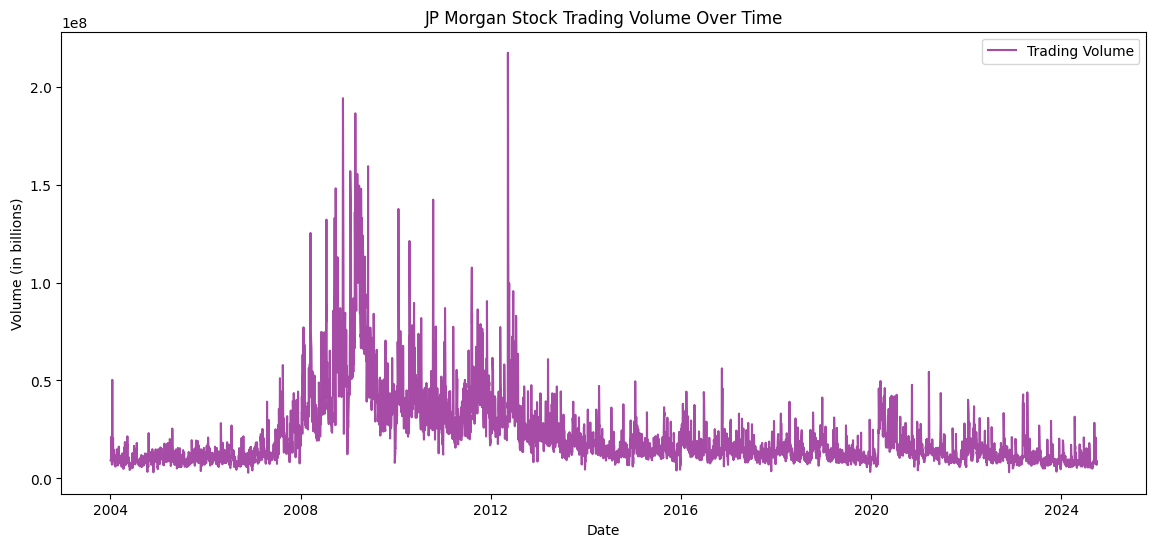

In [ ]:
# Plotting Trading Volume Trends over Time
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Volume'], label='Trading Volume', color='purple', alpha=0.7)
plt.title("JP Morgan Stock Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume (in billions)")
plt.legend()
plt.show()

The trading volume peaked significantly around 2008-2010, which aligns with the Great Recession period. This suggests increased trading activity during periods of economic uncertainty, likely driven by high volatility and investor reactions.


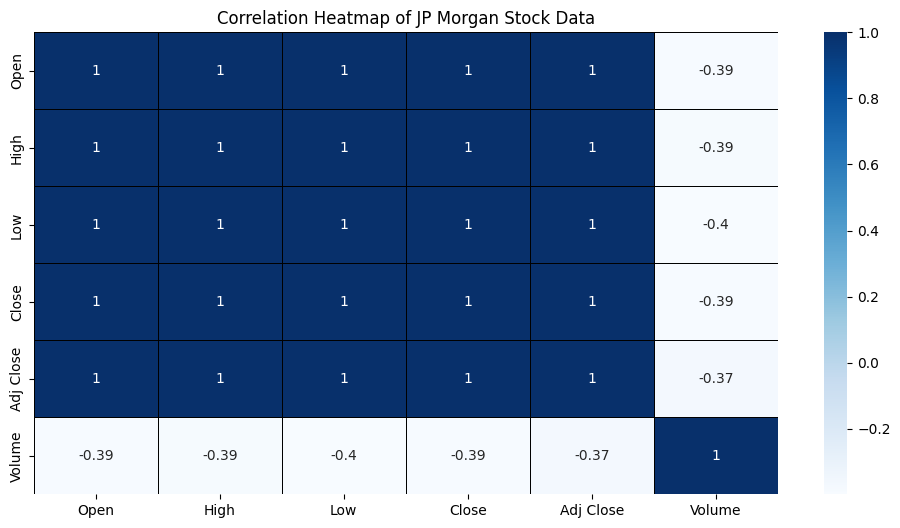

In [ ]:
# Correlation Analysis between different numerical features
correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

# Plotting a Heatmap for Correlation
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5, linecolor='black')
plt.title("Correlation Heatmap of JP Morgan Stock Data")
plt.show()

- The heatmap shows very strong correlations between Open, High, Low, Close, and Adj Close prices (correlation = 1), indicating that these features move together closely.

- The Volume has a moderate negative correlation (around -0.39 to -0.40) with price features, implying that high trading volumes may often be associated with lower prices, possibly reflecting heightened selling pressure.


In [ ]:
# Creating subsets & Filtering data for the Great Recession and COVID-19 pandemic
recession_data = data['2007-12-01':'2009-06-30']
covid_data = data['2020-03-01':'2020-12-31']

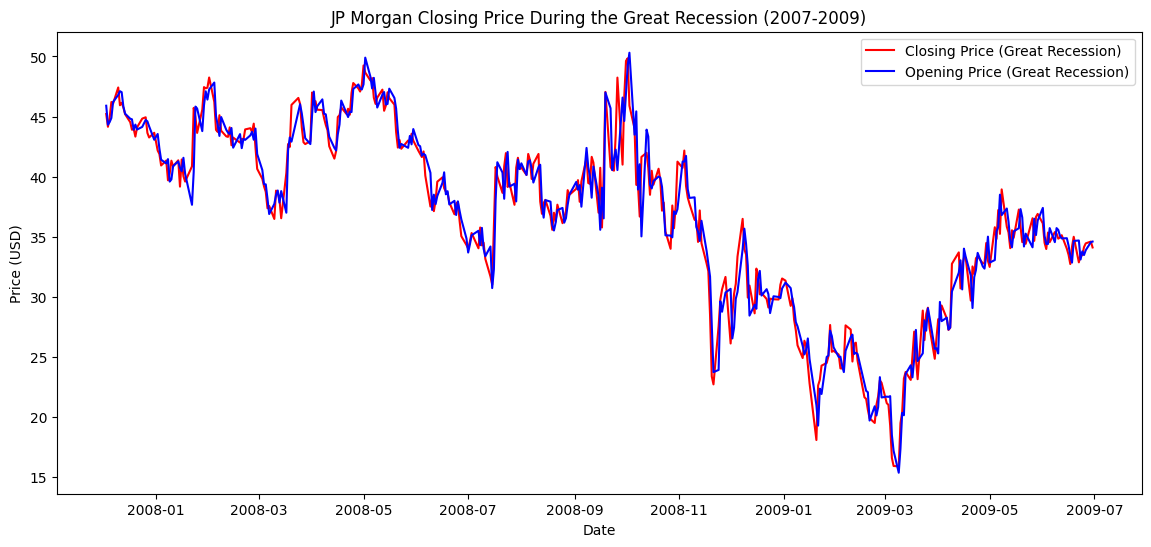

In [ ]:
# Plotting the Opening & Closing Price during the Great Recession
plt.figure(figsize=(14, 6))
plt.plot(recession_data.index, recession_data['Close'], label='Closing Price (Great Recession)', color='red')
plt.plot(recession_data.index, recession_data['Open'], label='Opening Price (Great Recession)', color='blue')
plt.title("JP Morgan Closing Price During the Great Recession (2007-2009)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

Great Recession (2007-2009): The Closing price fell significantly and showed high volatility, with frequent ups and downs. The stock experienced a steep decline during late 2008, reflecting market turmoil.

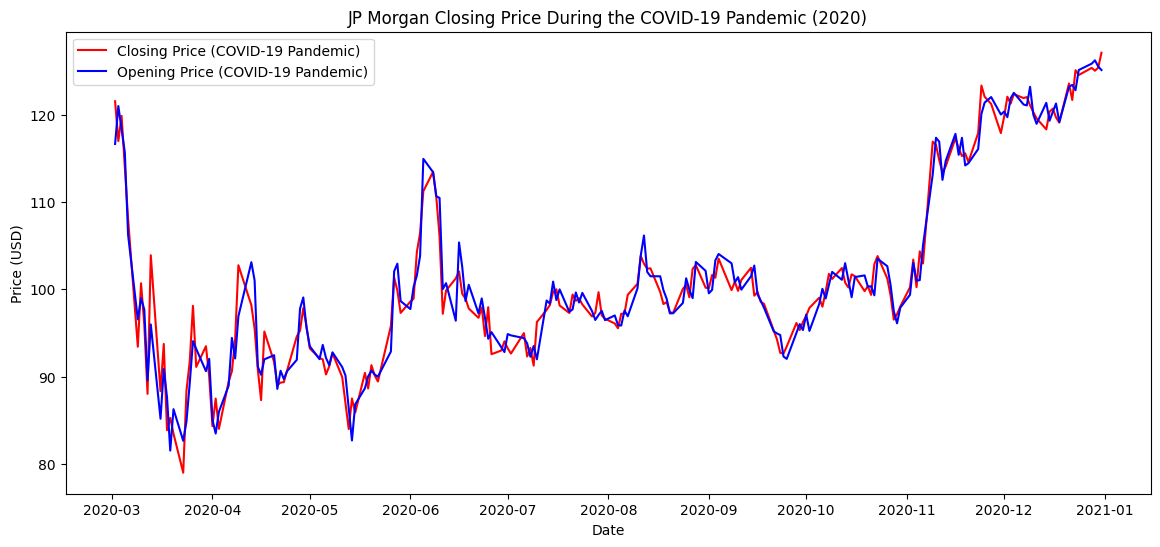

In [ ]:
# Plotting the Opening & Closing Price during the COVID-19 Pandemic
plt.figure(figsize=(14, 6))
plt.plot(covid_data.index, covid_data['Close'], label='Closing Price (COVID-19 Pandemic)', color='red')
plt.plot(covid_data.index, covid_data['Open'], label='Opening Price (COVID-19 Pandemic)', color='blue')
plt.title("JP Morgan Closing Price During the COVID-19 Pandemic (2020)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

COVID-19 Pandemic (2020): Similarly, during the initial months of the COVID-19 pandemic, there was a sharp decline in the stock price, followed by a period of recovery towards the end of 2020. This reflects the market's initial negative reaction to the pandemic and subsequent stabilization as conditions improved.


# **Model Selection**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Select the features for the models
features = data[['Open', 'High', 'Low', 'Volume']]
target = data['Close']

# Splitting data
train_data, temp_data, train_target, temp_target = train_test_split(features, target, test_size=0.3, shuffle=False)
val_data, test_data, val_target, test_target = train_test_split(temp_data, temp_target, test_size=0.5, shuffle=False)

scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler on the training data
train_data_scaled = scaler.fit_transform(train_data)
val_data_scaled = scaler.transform(val_data)
test_data_scaled = scaler.transform(test_data)

(train_data_scaled.shape, val_data_scaled.shape, test_data_scaled.shape)


((3654, 4), (783, 4), (784, 4))

The data has been successfully split and scaled:

**Training Set:** 3,654 observations (70%)

**Validation Set:** 783 observations (15%)

**Test Set:** 784 observations (15%)


#ARIMA Model

In [ ]:
!pip install pmdarima
!pip install tensorflow

In [ ]:
from pmdarima import auto_arima
# Load the dataset
data = pd.read_csv('JPM-Multiverse.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Select the target variable
target = data['Close']

# Train-test split
train_size = int(len(target) * 0.8)
train_target = target[:train_size]
test_target = target[train_size:]

# Ensure train_target and test_target indices are datetime
train_target.index = pd.to_datetime(train_target.index)
test_target.index = pd.to_datetime(test_target.index)

auto_model = auto_arima(train_target,
                        seasonal=False,
                        stepwise=True,
                        suppress_warnings=True,
                        trace=True,
                        max_p=10, max_q=10, max_d=2)

optimal_order = auto_model.order
print(f"Optimal ARIMA Order: {optimal_order}")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13512.988, Time=5.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13666.129, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13585.231, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13593.149, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13664.668, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13579.093, Time=0.94 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13580.628, Time=1.33 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=13514.596, Time=3.63 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=13514.590, Time=3.46 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13580.879, Time=1.52 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13554.817, Time=3.95 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=13578.090, Time=3.50 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=13514.947, Time=14.76 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=13511.638, Time=1.77 sec
 ARIMA(1,1,2)(0,0,

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA Model Training

# Fitting ARIMA model

arima_model = ARIMA(train_target, order=optimal_order)
arima_result = arima_model.fit()
arima_summary = arima_result.summary()

# Calculate residuals
residuals = train_target - arima_result.fittedvalues
residuals_lstm_input = np.array(residuals).reshape(-1, 1)

# Display ARIMA model summary and residuals
arima_summary, residuals_lstm_input[:5]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(<class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:                  Close   No. Observations:                 3654
 Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5040.183
 Date:                Mon, 09 Dec 2024   AIC                          10090.365
 Time:                        02:44:57   BIC                          10121.382
 Sample:                             0   HQIC                         10101.411
                                - 3654                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 ar.L1          0.8915      0.325      2.742      0.006       0.254       1.529
 ar.L2         -0.0710      0.212     -0.335      0.737      -0.486   

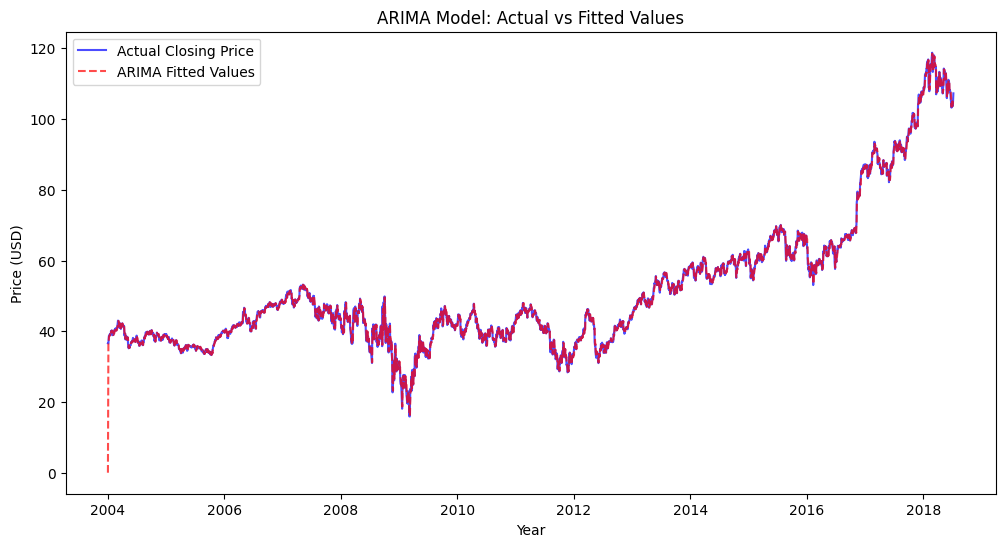

In [ ]:
# Plotting Actual vs Fitted Values for the ARIMA model
plt.figure(figsize=(12, 6))
plt.plot(train_target.index, train_target, label='Actual Closing Price', color='blue', alpha=0.7)
plt.plot(train_target.index, arima_result.fittedvalues, label='ARIMA Fitted Values', color='red', linestyle='--', alpha=0.7)
plt.title("ARIMA Model: Actual vs Fitted Values")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

The ARIMA model effectively captures the general trend of JP Morgan's stock prices, with the fitted values closely matching the actual closing prices, indicating that it can model linear relationships and seasonality well. However, there is a noticeable divergence during the initial period in 2004, likely due to model initialization and differencing effects. The model also performs reasonably well during periods of increased volatility, like the 2008 Great Recession, although it may struggle with abrupt movements due to its linear nature. Overall, while the ARIMA model provides a good fit for the data, there are some complexities and non-linear relationships that it cannot fully capture, which will be addressed using an LSTM model.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mAe = mean_absolute_error(train_target, arima_result.fittedvalues)
mSe = mean_squared_error(train_target, arima_result.fittedvalues)
r2 = r2_score(train_target, arima_result.fittedvalues)

print(f"Mean Absolute Error (MAE): {mAe}")
print(f"Mean Squared Error (MSE): {mSe}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.6484866625422123
Mean Squared Error (MSE): 1.2913378791132217
R-squared (R2): 0.9965672234822252


# LSTM Model


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0052 - val_loss: 6.6712e-04
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.6014e-04 - val_loss: 6.6800e-04
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.0691e-04 - val_loss: 6.6652e-04
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.0736e-04 - val_loss: 6.6411e-04
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.2186e-04 - val_loss: 6.7059e-04
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.0319e-04 - val_loss: 6.6444e-04
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.9360e-04 - val_loss: 6.6679e-04
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.8181e-04 - val_loss: 6.8424e-04
Epoch 9/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.1067e-04 - val_loss: 6.6281e-04
Epoch 10/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.8349e-04 - val_loss: 6.6198e-04
Epoch 11/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.6579e-04 - val_los

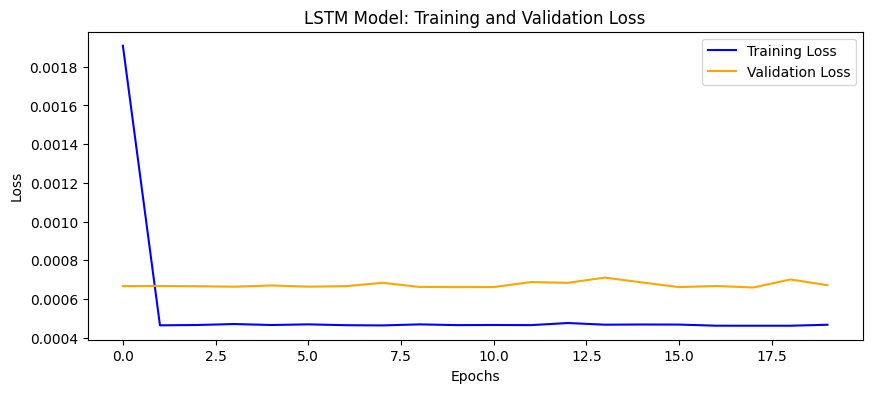

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Preparing Data for LSTM Model

# Normalize the residuals using MinMaxScaler
scaler_residuals = MinMaxScaler(feature_range=(0, 1))
residuals_scaled = scaler_residuals.fit_transform(residuals_lstm_input)

time_steps = 10

X, y = [], []
for i in range(len(residuals_scaled) - time_steps):
    X.append(residuals_scaled[i:i + time_steps])
    y.append(residuals_scaled[i + time_steps])

X, y = np.array(X), np.array(y)

# Split into training and validation set
train_size = int(0.8 * len(X))
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

# Build and Train the LSTM Model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=32, verbose=1)

# Plotting Training and Validation Loss over Epochs
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('LSTM Model: Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


 # **Model Refinement and Tuning**

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 0.0686
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 8.6722e-04
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.7136e-04
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 4.6207e-04
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4.8303e-04
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.5290e-04
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.6558e-04
Epoch 8/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.2593e-04
Epoch 9/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.7556e-04
Epoch 10/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.9443e-04
Epoch 11/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.5345e-04
Epoch 12/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 3.7528e-04
Epoch 13/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.4990e-04
Epoch 14/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.2257e-04
Epoch 15/50
163

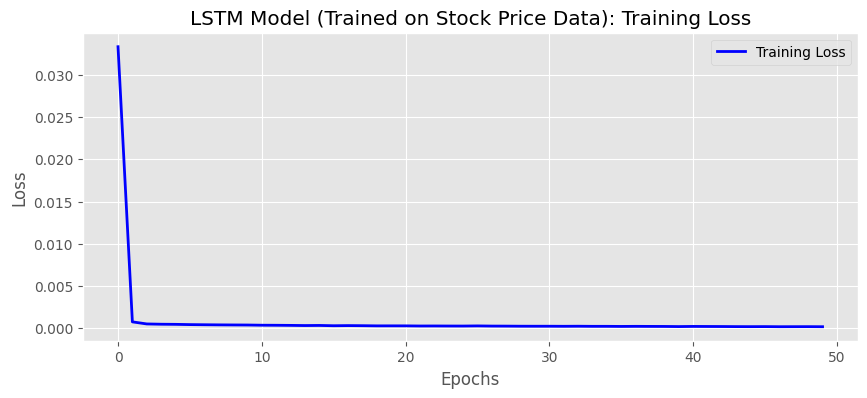

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Training LSTM Model on Original Stock Price Data

lstm_features = data[['Close']].values

# Normalize using MinMaxScaler
scaler_close = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler_close.fit_transform(lstm_features)
time_steps = 30

# Create sequences from the 'Close' prices for LSTM input
X_train, y_train = [], []
for i in range(len(train_scaled) - time_steps):
    X_train.append(train_scaled[i:i + time_steps])
    y_train.append(train_scaled[i + time_steps])

X_train, y_train = np.array(X_train), np.array(y_train)

# Define the LSTM model
model_lstm_direct = Sequential()
model_lstm_direct.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(time_steps, 1)))
model_lstm_direct.add(Dropout(0.2))
model_lstm_direct.add(LSTM(50, activation='relu'))
model_lstm_direct.add(Dense(1))
model_lstm_direct.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')

# Train the LSTM model
history_lstm_direct = model_lstm_direct.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

plt.style.use('ggplot')
plt.figure(figsize=(10, 4))
plt.plot(history_lstm_direct.history['loss'], label='Training Loss', color='blue', linewidth=2)
plt.title('LSTM Model (Trained on Stock Price Data): Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluating LSTM Model on Test Set

X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Reinitialize & using the MinMaxScaler
scaler_close = MinMaxScaler(feature_range=(0, 1))
lstm_features = train_data[['Close']].values
train_scaled = scaler_close.fit_transform(lstm_features)

test_features = test_data[['Close']].values
test_scaled = scaler_close.transform(test_features)
time_steps = 30

# Create sequences from the 'Close' prices for LSTM input
X_test, y_test = [], []
for i in range(len(test_scaled) - time_steps):
    X_test.append(test_scaled[i:i + time_steps])
    y_test.append(test_scaled[i + time_steps])

X_test, y_test = np.array(X_test), np.array(y_test)

# Use the trained LSTM model to predict on the test set
lstm_test_forecast = model_lstm_direct.predict(X_test)
lstm_test_forecast_inversed = scaler_close.inverse_transform(lstm_test_forecast)
y_test_inversed = scaler_close.inverse_transform(y_test.reshape(-1, 1))

# Calculate & Print Evaluation Metrics for LSTM model on test data
mae_lstm_test = mean_absolute_error(y_test_inversed, lstm_test_forecast_inversed)
rmse_lstm_test = np.sqrt(mean_squared_error(y_test_inversed, lstm_test_forecast_inversed))
r2_lstm_test = r2_score(y_test_inversed, lstm_test_forecast_inversed)

print(f"MAE: {mae_lstm_test}")
print(f"RMSE: {rmse_lstm_test}")
print(f"R-squared: {r2_lstm_test}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
MAE: 7.0405518576335435
RMSE: 8.144774426095523
R-squared: 0.9154009427934309


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


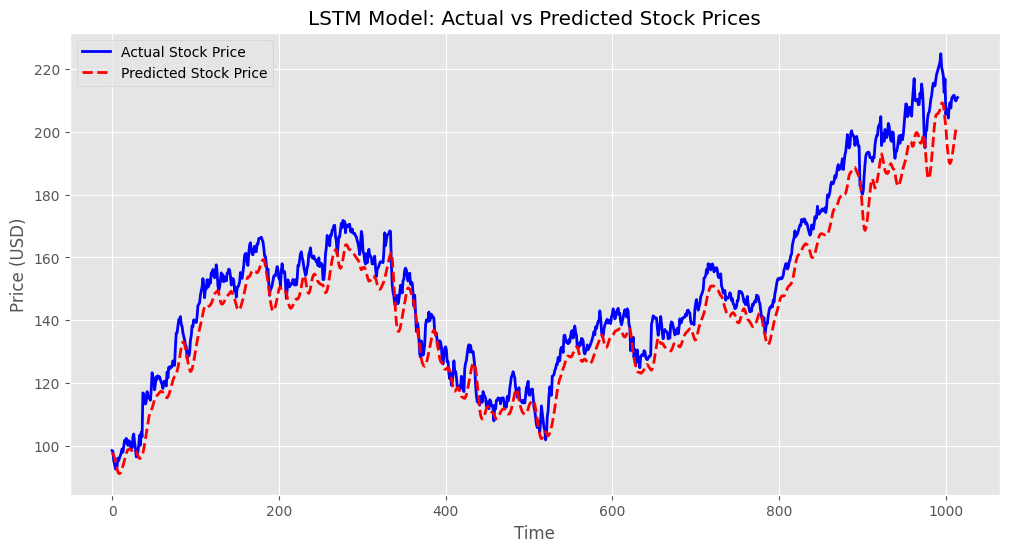

In [ ]:
# initialize and using the MinMaxScaler
scaler_close = MinMaxScaler(feature_range=(0, 1))
lstm_features = train_data[['Close']].values
train_scaled = scaler_close.fit_transform(lstm_features)

test_features = test_data[['Close']].values
test_scaled = scaler_close.transform(test_features)

time_steps = 30

# Create sequences
X_test, y_test = [], []
for i in range(len(test_scaled) - time_steps):
    X_test.append(test_scaled[i:i + time_steps])
    y_test.append(test_scaled[i + time_steps])

X_test, y_test = np.array(X_test), np.array(y_test)

lstm_test_forecast = model_lstm_direct.predict(X_test)

# Inverse transform LSTM predictions to get the original scale
lstm_test_forecast_inversed = scaler_close.inverse_transform(lstm_test_forecast)
y_test_inversed = scaler_close.inverse_transform(y_test.reshape(-1, 1))

actual_prices = y_test_inversed.flatten()
predicted_prices = lstm_test_forecast_inversed.flatten()

# Plotting the actual vs predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Stock Price', color='blue', linewidth=2)
plt.plot(predicted_prices, label='Predicted Stock Price', color='red', linestyle='--', linewidth=2)
plt.title('LSTM Model: Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# XGBoost Model

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

features = train_data[['Open', 'High', 'Low', 'Volume']].values
target = train_data['Close'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.05)
xgboost_model.fit(X_train, y_train)

y_pred = xgboost_model.predict(X_test)

# Calculate & Print Evaluation Metrics for XGBoost model on test data
mae_xgboost = mean_absolute_error(y_test, y_pred)
rmse_xgboost = np.sqrt(mean_squared_error(y_test, y_pred))
r2_xgboost = r2_score(y_test, y_pred)

print("Evaluation Metrics for XGBoost model on test data:")
print(f"MAE: {mae_xgboost}")
print(f"RMSE: {rmse_xgboost}")
print(f"R-squared: {r2_xgboost}")




Evaluation Metrics for XGBoost model on test data:
MAE: 0.4180035230645722
RMSE: 0.6346199293543096
R-squared: 0.9994092173469052


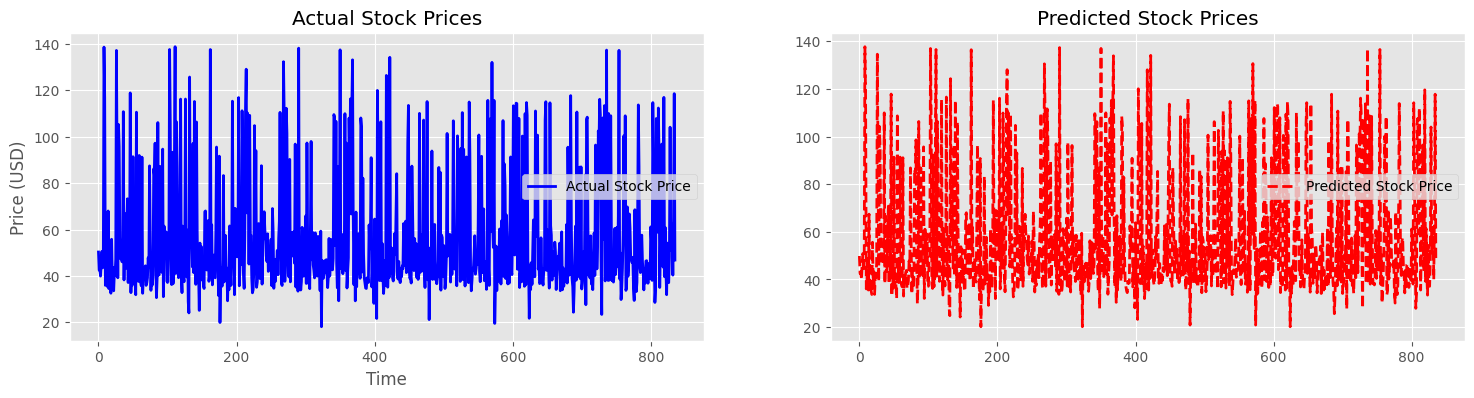

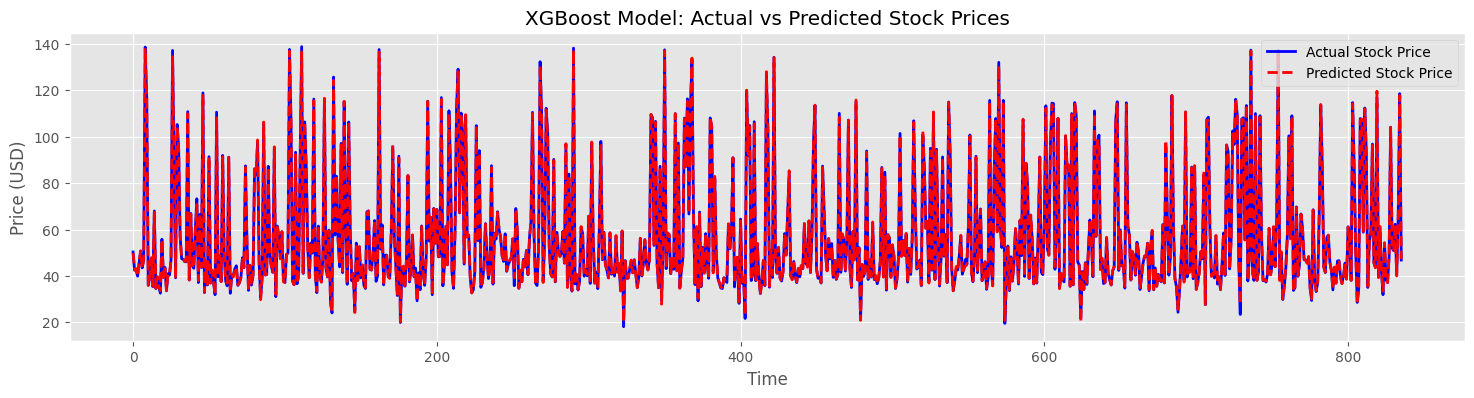

In [ ]:
# Define the actual and predicted values
actual_prices = y_test
predicted_prices = y_pred

fig, axes = plt.subplots(1, 2, figsize=(18, 4))

#plot for Actual stock prices and Predicted stock prices
axes[0].plot(actual_prices, label='Actual Stock Price', color='blue', linewidth=2)
axes[0].set_title('Actual Stock Prices')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Price (USD)')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(predicted_prices, label='Predicted Stock Price', color='red', linestyle='--', linewidth=2)
axes[1].set_title('Predicted Stock Prices')
axes[1].legend()
axes[1].grid(True)

# Plotting the actual vs predicted stock prices
plt.figure(figsize=(18, 4))
plt.plot(actual_prices, label='Actual Stock Price', color='blue', linewidth=2)
plt.plot(predicted_prices, label='Predicted Stock Price', color='red', linestyle='--', linewidth=2)
plt.title('XGBoost Model: Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# TFT Model


In [ ]:
!pip install pytorch_forecasting

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.9/181.9 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 34.2 MB/s eta 0:00:00


In [ ]:
!pip install pytorch-forecasting==1.0.0
!pip install pytorch-lightning==2.0.1.post0
!pip install torch==2.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.8/155.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: pytorch-forecasting
    Found existing installation: pytorch-forecasting 1.2.0
    Uninstalling pytorch-forecasting-1.2.0:
      Successfully uninstalled pytorch-forecasting-1.2.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.6/718.6 kB 24.9 MB/s eta 0:00:00
  Attempting uninstall: pytorch-lightning
    Found existing installation: py

In [ ]:
!!pip install torch==2.0.0

['Requirement already satisfied: torch==2.0.0 in /usr/local/lib/python3.10/dist-packages (2.0.0)',
 'Requirement already satisfied: filelock in /usr/local/lib/python3.10/dist-packages (from torch==2.0.0) (3.16.1)',
 'Requirement already satisfied: typing-extensions in /usr/local/lib/python3.10/dist-packages (from torch==2.0.0) (4.12.2)',
 'Requirement already satisfied: sympy in /usr/local/lib/python3.10/dist-packages (from torch==2.0.0) (1.13.1)',
 'Requirement already satisfied: networkx in /usr/local/lib/python3.10/dist-packages (from torch==2.0.0) (3.4.2)',
 'Requirement already satisfied: jinja2 in /usr/local/lib/python3.10/dist-packages (from torch==2.0.0) (3.1.4)',
 'Requirement already satisfied: nvidia-cuda-nvrtc-cu11==11.7.99 in /usr/local/lib/python3.10/dist-packages (from torch==2.0.0) (11.7.99)',
 'Requirement already satisfied: nvidia-cuda-runtime-cu11==11.7.99 in /usr/local/lib/python3.10/dist-packages (from torch==2.0.0) (11.7.99)',
 'Requirement already satisfied: nvid

In [ ]:
!pip show torch

Name: torch
Version: 2.0.0
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, jinja2, networkx, nvidia-cublas-cu11, nvidia-cuda-cupti-cu11, nvidia-cuda-nvrtc-cu11, nvidia-cuda-runtime-cu11, nvidia-cudnn-cu11, nvidia-cufft-cu11, nvidia-curand-cu11, nvidia-cusolver-cu11, nvidia-cusparse-cu11, nvidia-nccl-cu11, nvidia-nvtx-cu11, sympy, triton, typing-extensions
Required-by: accelerate, fastai, lightning, peft, pytorch-forecasting, pytorch-lightning, pytorch_optimizer, sentence-transformers, timm, torchaudio, torchmetrics, torchvision, triton


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
   | Name                               | Type                            | P

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


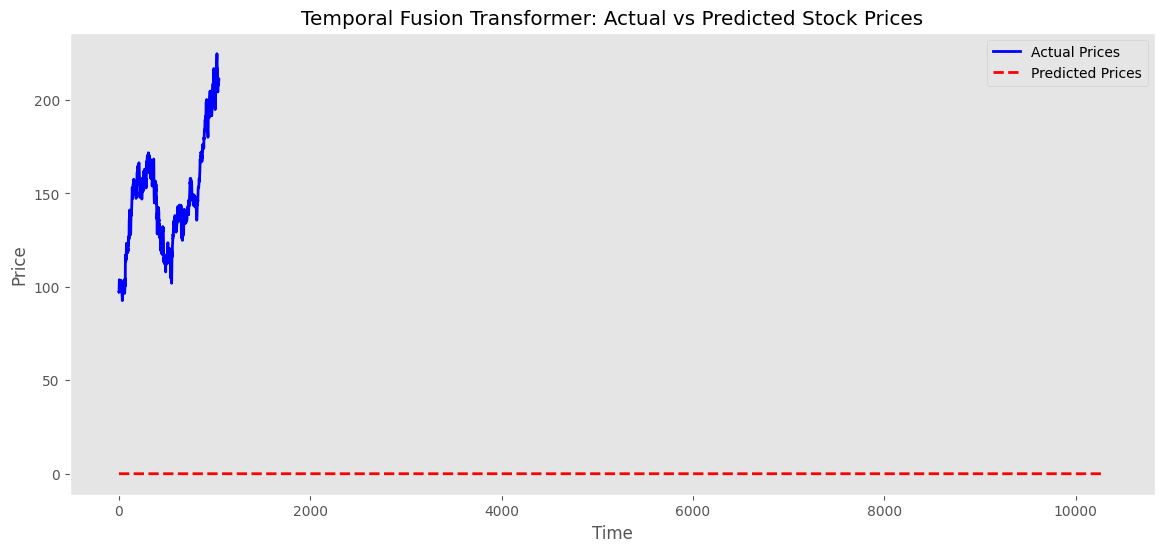

In [ ]:
import pandas as pd
import numpy as np
import torch
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import RMSE
from lightning.pytorch import Trainer
import matplotlib.pyplot as plt

data = pd.read_csv('JPM-Multiverse.csv')

# Prepare Data
data['time_idx'] = np.arange(len(data))
data['group'] = 0

# Define the forecasting parameters
max_prediction_length = 10
max_encoder_length = 5
training_cutoff = int(len(data) * 0.8)

import pytorch_lightning as pl

class TFTModel(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.model = TemporalFusionTransformer()

    def forward(self, x):
        return self.model(x)

# Create TimeSeriesDataSet for Training
training_data = TimeSeriesDataSet(
    data.iloc[:training_cutoff],
    time_idx="time_idx",
    target="Close",
    group_ids=["group"],
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    time_varying_known_reals=["time_idx", "Open", "High", "Low", "Volume"],
    time_varying_unknown_reals=["Close"],
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
)

# Create Validation Data from Training Dataset
validation_data = TimeSeriesDataSet.from_dataset(training_data, data.iloc[training_cutoff:])

# Prepare DataLoaders
batch_size = 64
train_loader = training_data.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_loader = validation_data.to_dataloader(train=False, batch_size=batch_size, num_workers=0)

# Define the Temporal Fusion Transformer Model
tft_model = TemporalFusionTransformer.from_dataset(
    training_data,
    learning_rate=0.03,
    hidden_size=16,
    attention_head_size=4,
    dropout=0.1,
    hidden_continuous_size=8,
    output_size= 1,
    loss=RMSE(),
    log_interval=10,
    reduce_on_plateau_patience=4,
)

# Train the Model
trainer = Trainer(max_epochs=30)
trainer.fit(tft_model, train_loader, val_loader)

# Make Predictions
predictions = tft_model.predict(val_loader, mode="raw", return_x=True)

rawpredictions = predictions[0]
x = predictions[1]
index = predictions[2]

# Extract Actual and Predicted Values
actual_values = data.iloc[training_cutoff:]["Close"].values
predicted_values = rawpredictions["prediction"].cpu().detach().numpy()[:, :, 0].flatten()

# Visualize Actual vs Predicted Prices
plt.figure(figsize=(14, 6))
plt.plot(actual_values, label="Actual Prices", color="blue", linewidth=2)
plt.plot(predicted_values, label="Predicted Prices", color="red", linestyle="--", linewidth=2)
plt.title("Temporal Fusion Transformer: Actual vs Predicted Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()
